## Exercícios¶
Utilize o dataset breast_cancer.csv e o KNN para criar e comparar diferentes modelos variando tanto a quantidade de vizinhos quanto a métrica de distância.
Comece com um modelo baseline sem tratar os dados, discuta em grupo quais melhorias nos dados devem ser feitas e teste! =)

Recomendação: façam os exercícios em um novo notebook. Ao longo do curso iremos implementar melhorias e comparações com outros modelos. E separando em um novo notebook fica mais fácil de salvar no git como portfólio ou postar no linkedin.

In [119]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
from ml_utils import *

In [121]:
# Importa os pacotes de manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [123]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [124]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 0)

print("Tamanho do treino: ", X_train.shape)
print("Tamanho do teste: ", X_test.shape)


# Instancia o StratifiedKFold com suffle
folds = StratifiedKFold(5, shuffle=True, random_state=42)

# Instancia o modelo considerando 3 vizinhos mais próximos e distância euclidiana
k=3
clf = KNeighborsClassifier(n_neighbors=k, 
                           p=2)

Tamanho do treino:  (398, 30)
Tamanho do teste:  (171, 30)


In [126]:
# Realiza o fit do modelo passando o X_train e y_train
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [127]:
# Utiliza o modelo treinado para predizer no dataset de teste
y_pred = clf.predict(X_test)

In [128]:
y_pred_train = clf.predict(X_train)

In [129]:
clf.predict_proba(X_test)

array([[0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [130]:
# parâmetros do modelo
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

Acurácia do teste: 91.8%
Acurácia do treino: 95.2%


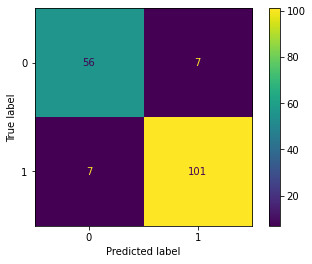

In [131]:
# Calcular a acurácia utilizando o accuracy_score
ac = accuracy_score(y_test, y_pred)
ac_train = accuracy_score(y_train, y_pred_train)

print(f"Acurácia do teste: {ac:.1%}")
print(f"Acurácia do treino: {ac_train:.1%}")

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        63
           1       0.94      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



In [133]:
# Importa scaler
from sklearn.preprocessing import MinMaxScaler

# Instancia scaler
sc = MinMaxScaler()

# Faz o fit_transform dos dados de treino
# sc.fit(X_train)
# X_train = sc.transform(X_train)

X_train = sc.fit_transform(X_train)

# E aplica o scaler nos dados de teste
X_test = sc.transform(X_test)

In [134]:
k=5
clf = KNeighborsClassifier(n_neighbors=k, 
                           p=1)

In [135]:
# Realiza o fit do modelo passando o X_train e y_train
clf.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [136]:
y_pred = clf.predict(X_test)

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



Acurácia do teste: 95.9%
Acurácia do treino: 95.2%


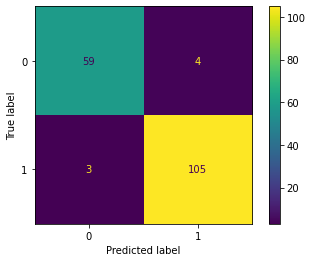

In [138]:
ac = accuracy_score(y_test, y_pred)
ac_train = accuracy_score(y_train, y_pred_train)

print(f"Acurácia do teste: {ac:.1%}")
print(f"Acurácia do treino: {ac_train:.1%}")

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20,
                                                    random_state = 0,
                                                    stratify=y)

print("Tamanho do treino: ", X_train.shape)
print("Tamanho do teste: ", X_test.shape)


# Instancia o StratifiedKFold com suffle
folds = StratifiedKFold(5, shuffle=True, random_state=42)

# Instancia o modelo considerando 3 vizinhos mais próximos e distância euclidiana
k=3
clf = KNeighborsClassifier(n_neighbors=k, 
                           p=2)

train_scores, val_scores = train_model(X_train, y_train, folds, clf, accuracy_score)

Tamanho do treino:  (455, 30)
Tamanho do teste:  (114, 30)
Split:  0
TREINO valor MIN 0.0  MAX 4254.0
VAL valor MIN 0.0  MAX 2906.0
Split:  1
TREINO valor MIN 0.0  MAX 4254.0
VAL valor MIN 0.0  MAX 3216.0
Split:  2
TREINO valor MIN 0.0  MAX 3432.0
VAL valor MIN 0.0  MAX 4254.0
Split:  3
TREINO valor MIN 0.0  MAX 4254.0
VAL valor MIN 0.0  MAX 3234.0
Split:  4
TREINO valor MIN 0.0  MAX 4254.0
VAL valor MIN 0.0  MAX 3432.0
CV mean train score: 0.9907, std: 0.0013.
CV mean validation score: 0.9714, std: 0.0204.


In [140]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [141]:
y_pred = clf.predict(X_test)

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        42
           1       0.92      0.93      0.92        72

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

